# ----------------------DISCLAIMER---------------------

This is a research project that I and two other colleagues (Brice and Mastel) completed 

***Abstract***: Security is one of the main pillars every country strives to maintain. Almost every government has a security agency in place whose responsibility is to fight crime and maintain law and order of the society. With the growing interest in data it has become increasingly challenging for these agencies to analyze the immense data they collect to draw valuable insight. The goal of this project is to examine the Chicago crime dataset over the years in order to provide African law enforcement agencies with a system that would predict crimes that would result in an arrest for better crime categorization. This would help these agencies better categorize crimes hence efficiently allocating resources. As this is a classification problem this paper explores different machine learning classification models like Logistic regression,Bagging Classifier and Random forest classifier with the results placing Random forest as the best performing model for this task.

Prposed Solution : PREDICTIVE ANALYTICS SOLUTION OF CRIMES IN URBAN CITIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import math
from sklearn.preprocessing import LabelEncoder
from time import sleep
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import folium
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crime_data= pd.read_csv("drive/MyDrive/data2.csv")

# Count the total number of instance before preprocessing



In [ ]:
crime_data.count()

ID                      7491320
Case Number             7491316
Date                    7491320
Block                   7491320
IUCR                    7491320
Primary Type            7491320
Description             7491320
Location Description    7482317
Arrest                  7491320
Domestic                7491320
Beat                    7491320
District                7491273
Ward                    6876479
Community Area          6877842
FBI Code                7491320
X Coordinate            7414296
Y Coordinate            7414296
Year                    7491320
Updated On              7491320
Latitude                7414296
Longitude               7414296
Location                7414296
dtype: int64

In [ ]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
crime_data.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7491315,12620689,JF147642,02/15/2022 03:00:00 PM,031XX N NATOMA AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,...,36.0,18.0,05,1131538.0,1920072.0,2022,02/22/2022 03:54:22 PM,41.936930,-87.791995,"(41.936929527, -87.791995394)"
7491316,12619827,JF146720,02/15/2022 05:30:00 PM,029XX W CARROLL AVE,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,27.0,27.0,06,1156826.0,1902270.0,2022,02/22/2022 03:54:22 PM,41.887604,-87.699541,"(41.887603583, -87.699541177)"
7491317,12619191,JF145808,02/15/2022 09:00:00 PM,059XX N BROADWAY,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,True,False,...,48.0,77.0,07,1167225.0,1939749.0,2022,02/22/2022 03:54:22 PM,41.990231,-87.660272,"(41.990230655, -87.660272289)"
7491318,12618908,JF145662,02/15/2022 07:45:00 PM,077XX S ABERDEEN ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,...,17.0,71.0,08A,1170325.0,1853489.0,2022,02/22/2022 03:54:22 PM,41.753459,-87.651391,"(41.753459385, -87.651390605)"
7491319,12618612,JF144824,02/15/2022 06:30:00 AM,043XX S ARCHER AVE,1755,OFFENSE INVOLVING CHILDREN,CHILD ABANDONMENT,SIDEWALK,False,False,...,15.0,58.0,20,1156244.0,1875891.0,2022,02/22/2022 03:54:22 PM,41.815228,-87.702390,"(41.815228411, -87.702390243)"


In [ ]:
crime_data.shape # Shape of the dataset

(7491320, 22)

In [ ]:
crime_data.info() # Dataset inforamtion 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7491320 entries, 0 to 7491319
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
crime_data.describe() # Statistical analysis of the dataset

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.491320e+06,7.491320e+06,7.491273e+06,6.876479e+06,6.877842e+06,7.414296e+06,7.414296e+06,7.491320e+06,7.414296e+06,7.414296e+06
mean,6.800319e+06,1.187210e+03,1.129447e+01,2.272898e+01,3.753364e+01,1.164571e+06,1.885739e+06,2.009464e+03,4.184206e+01,-8.767160e+01
std,3.372549e+06,7.029545e+02,6.947971e+00,1.383673e+01,2.154097e+01,1.684979e+04,3.227772e+04,5.881508e+00,8.880347e-02,6.108880e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.675539e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152954e+06,1.859070e+06,2.004000e+03,4.176871e+01,-8.771378e+01
50%,6.794688e+06,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166069e+06,1.890665e+06,2.009000e+03,4.185577e+01,-8.766593e+01
75%,9.753952e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176364e+06,1.909228e+06,2.014000e+03,4.190670e+01,-8.762824e+01
max,1.262435e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01


# **Statistical analysis of numerical features** 

In [ ]:
# describe categorical features
crime_data.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Arrest,7491320,2,False,5492207
Domestic,7491320,2,False,6466189
FBI Code,7491320,26,06,1576689
Primary Type,7491320,36,THEFT,1576689
Location Description,7482317,214,STREET,1943027
IUCR,7491320,403,0820,608936
Description,7491320,539,SIMPLE,880610
Updated On,7491320,4718,02/10/2018 03:50:01 PM,2788198
Block,7491320,61996,100XX W OHARE ST,16057
Location,7414296,882348,"(41.976290414, -87.905227221)",13905


In [ ]:
crime_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
crime_data['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON',
       'STALKING', 'KIDNAPPING', 'INTIMIDATION', 'HOMICIDE',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

In [ ]:
crime_data['Community Area'].unique()

array([61., 25., 44., 21., 71., 24., 31., 27., 63., 65., 11., 49., 39.,
       51., 15., 52., 12., 43., 46., 32., 68., 14., 29.,  2., 69., 23.,
       35.,  8.,  3.,  6., 56., 28., 53., 50., 33., 13., 74., 19., 45.,
       72., 22., 64.,  7.,  5., 26., 66., 59., 77.,  1., 10., 67., 38.,
       41., 60., 30., 54., 58., 48., 73., 70., 40., 34., 16., 18.,  4.,
       17., 42., 37., 75., 62., 20., 57., 76., 47., nan,  9., 36., 55.,
        0.])

In [ ]:
crime_data.isna().sum() # Counting number of NaNs in the dataset

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      9003
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614841
Community Area          613478
FBI Code                     0
X Coordinate             77024
Y Coordinate             77024
Year                         0
Updated On                   0
Latitude                 77024
Longitude                77024
Location                 77024
dtype: int64

# We can see that the number of NaNs is minimal in comparison to the size of our dataset; it accounts for less than 10% of the total. Dropping NaNs would have no effect on our analysis, based on this.

# Now that we have seen data set details, we can drop some unwanted columns


In [ ]:
crime_data.drop(columns=['ID','Case Number','IUCR','Description','FBI Code','X Coordinate','Y Coordinate','Updated On','Domestic'],inplace=True)

In [ ]:
crime_data.head()

,Date,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Location
0,09/05/2015 01:30:00 PM,043XX S WOOD ST,BATTERY,RESIDENCE,False,924,9.0,12.0,61.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,THEFT,CTA BUS,False,1511,15.0,29.0,25.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,THEFT,RESIDENCE,False,631,6.0,8.0,44.0,2018,NaN,NaN,NaN
3,09/05/2015 12:45:00 PM,035XX W BARRY AVE,NARCOTICS,SIDEWALK,True,1412,14.0,35.0,21.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,ASSAULT,APARTMENT,False,1522,15.0,28.0,25.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"


# Removing AM/PM on date and date formatting 

In [ ]:
crime_data['Date'] = crime_data['Date'].str[:-11]
crime_data['Date']= pd.to_datetime(crime_data['Date'])

### Before doing exploratory analysis on the data set, we performed preliminary feature engineering on the date column to have a better understanding of the data at various periods.

1. Add Month column on our data set
2. Add day of the week column on our data set
3. Add day of the month column on our data set
4. Add day of the year column on our data set
5. Add week of the month column on our data set

In [ ]:
crime_data = crime_data.dropna(subset=['Date'])


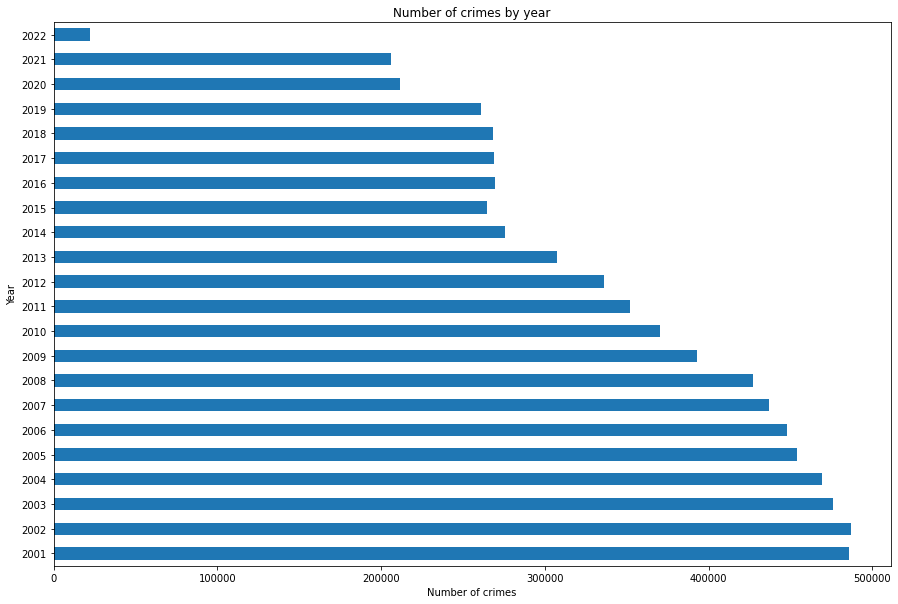

In [ ]:
crime_data.index = pd.DatetimeIndex(crime_data.Date)
crime_data.drop(columns=['Date'],inplace=True)
crime_data['Month'] = crime_data.index.month
crime_data['dayOfWeek'] = crime_data.index.dayofweek
crime_data['dayOfMonth'] = crime_data.index.day
crime_data['dayOfYear'] = crime_data.index.dayofyear
crime_data['weekOfMonth'] = crime_data.dayOfMonth.apply(lambda d: (d - 1) // 7 + 1)

dayOfYear = list(crime_data.index.dayofyear)

weekOfYear = [math.ceil(i/7) for i in dayOfYear]
crime_data['weekOfYear'] = weekOfYear
plt.figure(figsize=(15,10))
crime_data.groupby([crime_data.Year]).size().plot(kind='barh')
plt.ylabel('Year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by year')
plt.show()


# We can see that there's a drop in crime over the years

# Number of crimes per day of the week

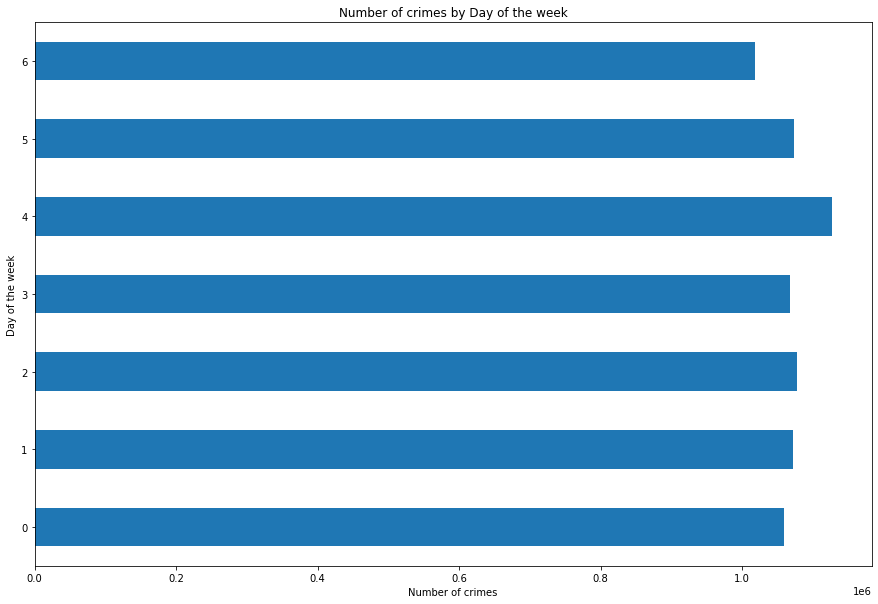

In [ ]:
plt.figure(figsize=(15,10))
crime_data.groupby([crime_data.dayOfWeek]).size().plot(kind='barh')
plt.ylabel('Day of the week')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by Day of the week')
plt.show()

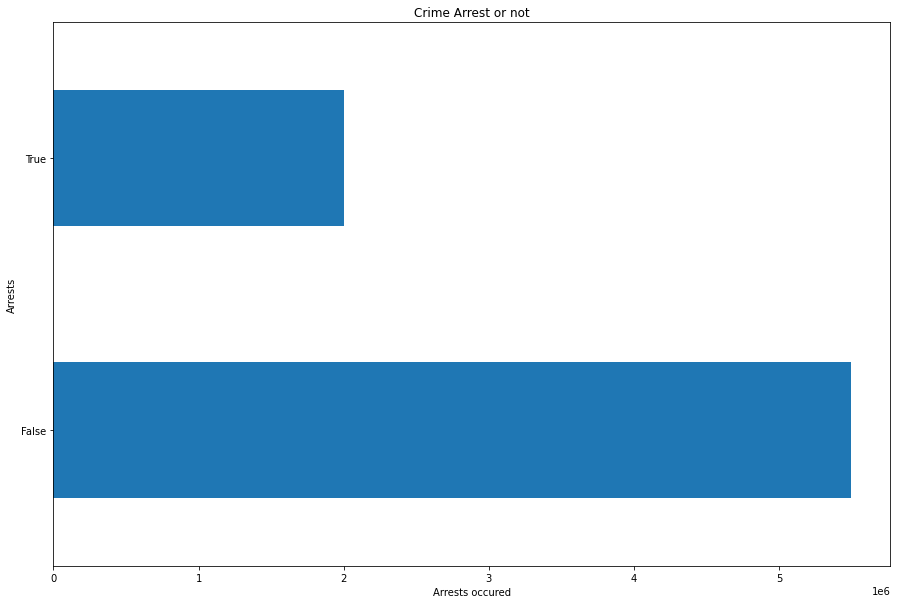

In [ ]:
plt.figure(figsize=(15,10))
crime_data.groupby([crime_data.Arrest]).size().plot(kind='barh')
plt.ylabel('Arrests')
plt.xlabel('Arrests occured')
plt.title('Crime Arrest or not')
plt.show()

## Number of crimes by month of the year

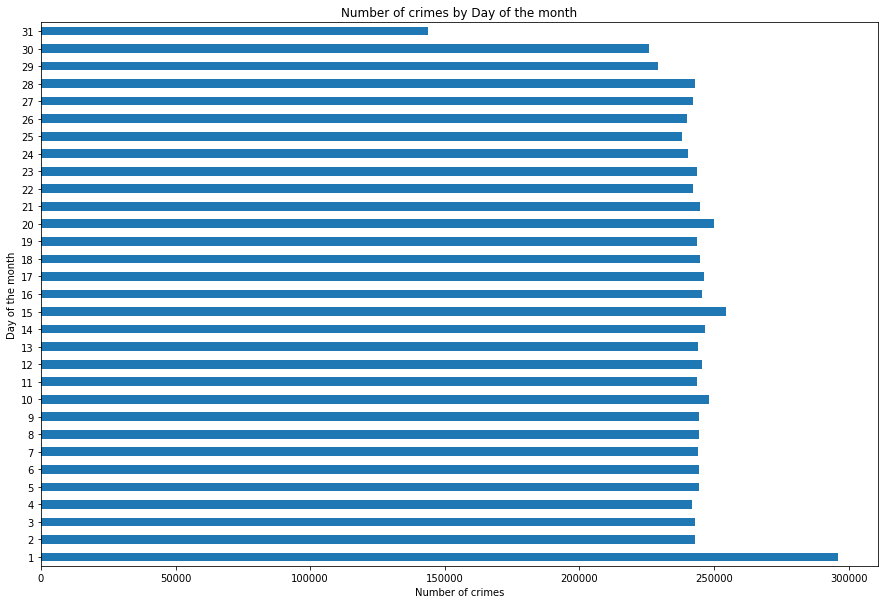

In [ ]:
plt.figure(figsize=(15,10))
crime_data.groupby([crime_data.dayOfMonth]).size().plot(kind='barh')
plt.ylabel('Day of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by Day of the month')
plt.show()

## The above bar graph showing the number of crimes committed by day of the month shows that there is a high crime rate on the first day of the month, which might be because criminals assume that people have received their wages and are out shopping, which prompts them to conduct these crimes. Also, we can observe that crime rates climb in the middle of the month, which might be because individuals are broke, leading criminals to conduct these crimes.

Number of crimes by day of the month

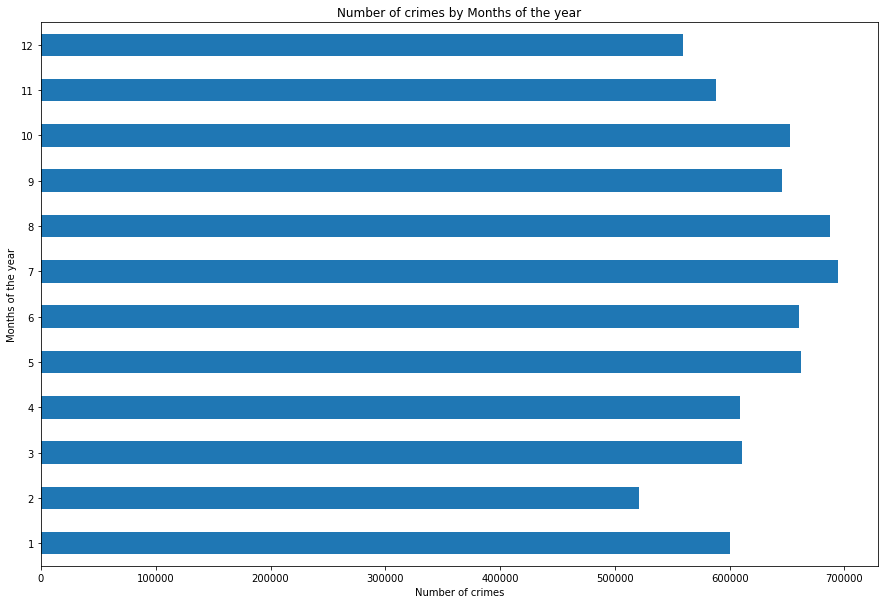

In [ ]:
plt.figure(figsize=(15,10))

crime_data.groupby([crime_data.Month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by Months of the year')
plt.show()

## Now let's visualize number of crimes across different years using time series 

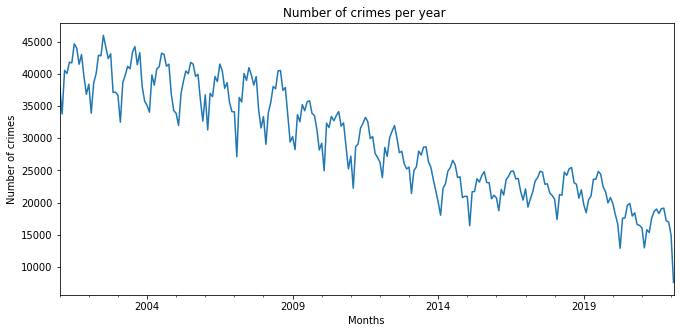

In [ ]:
plt.figure(figsize=(11,5))
crime_data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per year ')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

The above time series graph clearly shows that crime has been gradually dropping throughout the years.

Feature correlation

In [ ]:
# plotting correlation heatmap
# plt.figure(figsize=(20,7))
# dataplot = sns.heatmap(crime_data.corr(), cmap="YlGnBu", annot=True)
# plt.show()

# Location Description and its semantics.
## The graph below shows the number of crimes that occured per location

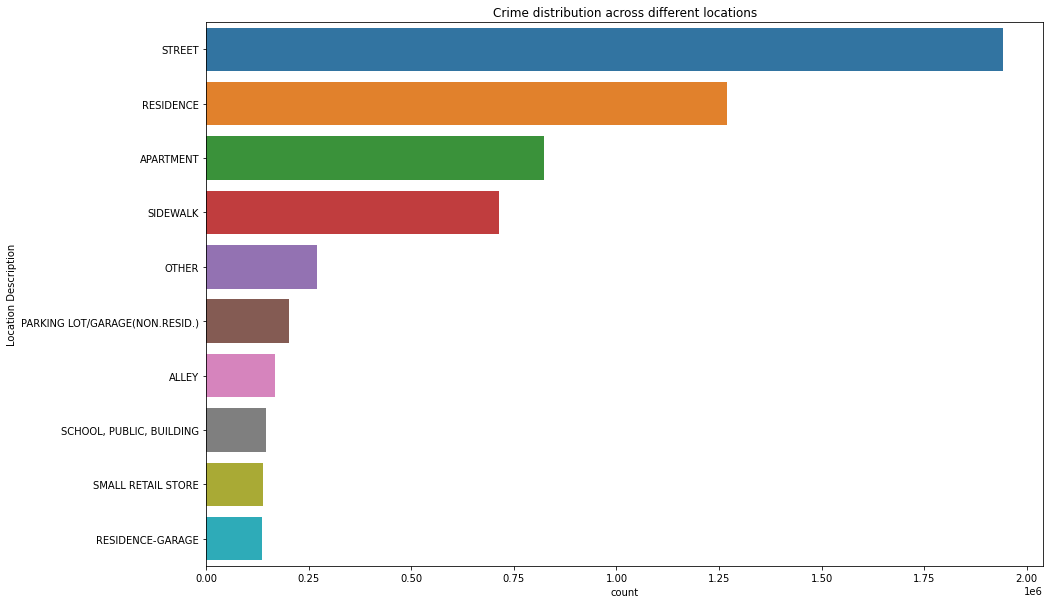

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = crime_data, order =
              crime_data['Location Description'].value_counts().iloc[:10].index)
plt.title("Crime distribution across different locations")
plt.show()

## Number of crimes by district

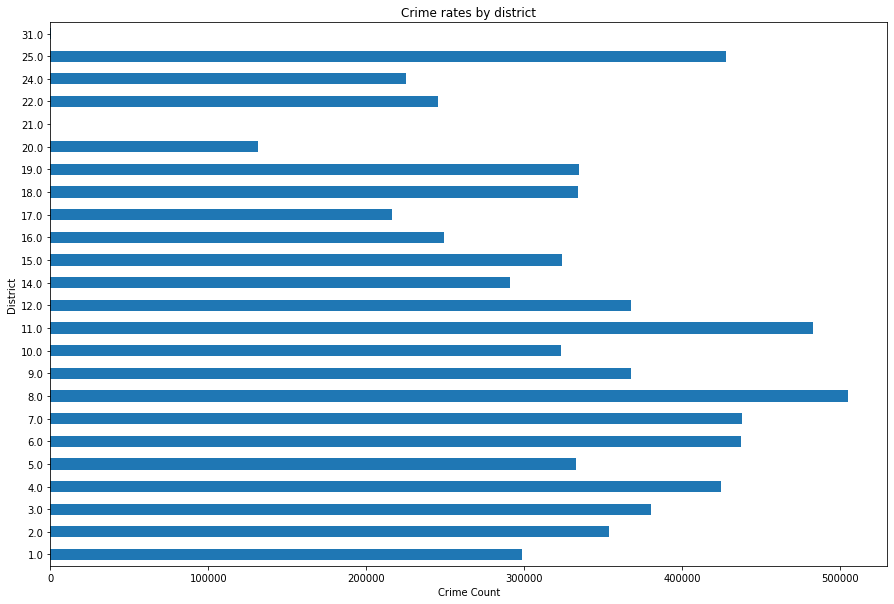

In [ ]:
plt.figure(figsize=(15,10))
crime_data.groupby([crime_data.District]).size().plot(kind='barh')
plt.xlabel("Crime Count")
plt.title("Crime rates by district")
plt.show()

###Visualising crime hot spots on the chicago map
###Crime hot spots are locations that have over a 1000 occurences of crimes
###These locations are represented by a larger, orange spot

In [ ]:
# retrieve each the total occurence of each location
unique_locations = crime_data['Location'].value_counts()
# dataframe of location coordinates and their occurence
CR_index = pd.DataFrame({"coordinates" : unique_locations.index, "occurence":unique_locations})
CR_index.index = range(len(unique_locations))

# function to extract locations in lat,long variables
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

CR_index['LocationCoord'] = CR_index['coordinates'].apply(Location_extractor)
CR_index  = CR_index.drop(columns=['coordinates'], axis = 1)

chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="OpenStreetMap",
                        max_bounds=True)

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['occurence'].iloc[i] / 150
    
    #flag a location that appears more than 1000 as a hotspot
    if CR_index['occurence'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['occurence'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

chicago_map_crime

In [ ]:
crime_data['Location'].value_counts().index

Index(['(41.976290414, -87.905227221)', '(41.754592961, -87.741528537)',
       '(41.883500187, -87.627876698)', '(41.897895128, -87.624096605)',
       '(41.909664252, -87.742728815)', '(41.896888586, -87.628203192)',
       '(41.788987036, -87.74147999)', '(41.885487535, -87.726422045)',
       '(41.868180939, -87.709271389)', '(41.88233367, -87.627841791)',
       ...
       '(41.793382515, -87.718325565)', '(41.701828479, -87.56413081)',
       '(41.889873608, -87.753117464)', '(41.743454173, -87.575689684)',
       '(41.812797172, -87.669792401)', '(41.994619385, -87.664158544)',
       '(41.687316218, -87.671650853)', '(41.818473948, -87.644428031)',
       '(41.969717113, -87.736566619)', '(41.892414452, -87.632068436)'],
      dtype='object', length=882348)

###Visualisation of crimes and whether they resulted in arrests or not
### Green = arrest, Red = no arrest

In [ ]:
crime_data = crime_data.dropna()
crime_data = crime_data.drop(columns=['Beat', 'District', 'Ward'], axis = 1)

In [ ]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=10,
                        tiles="OpenStreetMap",
                        max_bounds=True)

locations = crime_data.groupby('Community Area').first()

new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locations.head()

popup_text = """Community Index : {}<br
                Arrest : {}<br>
                Location Description : {}<br>"""

for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    if new_locations['Arrest'].iloc[i] == True:
        color = "#00FF00"
    else:
        color = "#FF0000"
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True, color=color).add_to(chicago_map)

chicago_map


In [ ]:
crime_data = crime_data.drop(columns=['Latitude', 'Longitude'], axis = 1)


# **DATA PREPROCESSING**
1. Checking the presence of NaN
2. handle NaN
3. Conver Categorical to numerical 




In [ ]:
crime_data.isna().sum()

Block                   0
Primary Type            0
Location Description    0
Arrest                  0
Community Area          0
Year                    0
Location                0
Month                   0
dayOfWeek               0
dayOfMonth              0
dayOfYear               0
weekOfMonth             0
weekOfYear              0
dtype: int64

## From these, we can infer that null values are few since our data set contains more that 7M records, so we can drop missing values 

In [ ]:
crime_data.dropna(inplace=True)

In [ ]:
# sns.heatmap(crime_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# plt.show()

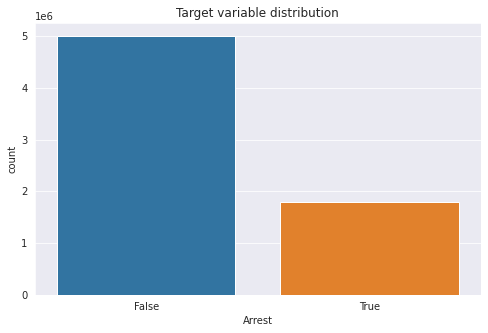

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.countplot(crime_data['Arrest'])
plt.title('Target variable distribution')
plt.show()

### We can that there is imbalance in our target variable

# Converting categorical data to numerical

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# # First apply label encoding to our data set to transform categorical into numerical

list_ =['Block','Primary Type','Location Description','Arrest','Location']
for i in list_:
  label= label_encoder.fit_transform(crime_data[i])
  crime_data.drop(i,axis=1,inplace=True)
  crime_data[i]=label
crime_data.head()

,Community Area,Year,Month,dayOfWeek,dayOfMonth,dayOfYear,weekOfMonth,weekOfYear,Block,Primary Type,Location Description,Arrest,Location
Date,,,,,,,,,,,,,
2015-09-05,61.0,2015,9,5,5,248,1,36,21410,2,158,0,277977
2015-09-04,25.0,2015,9,4,4,247,1,36,4930,33,68,0,417922
2015-09-05,21.0,2015,9,5,5,248,1,36,18425,18,181,1,527268
2015-09-05,25.0,2015,9,5,5,248,1,36,262,1,17,0,384808
2015-09-05,71.0,2015,9,5,5,248,1,36,32511,3,158,0,110048


# Firstly, our dataset had over 7M records ranging from the year 2001 to 2022, and our devices are not properly equipped to train/manipulate such large datasets, therefore we opted to reduce the range from 2020 to 2021 which ultimately brought our rows down over 400k which is a much lighter load to work with.


In [ ]:
crime_data= crime_data.loc['2020-01-01':'2021-12-31'] # Selecting data of one year range.
X= crime_data.drop(columns=['Arrest'])
y= crime_data.Arrest
crime_data.shape

(409837, 13)

# **FEATURE SELECTION**

# Now let's do feature selection using forward stepwise


In [ ]:
# Now let's do feature selection using forward stepwise
def forward_regression(X, y,threshold_in, verbose=False): 
    feature_in = []
    all_feautres =[]
    initial_list = []
    included = list(initial_list)
    old_best = 0
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        new_bic = pd.Series(index=excluded)
        # print("Input Features :")
        # print(excluded)
        
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
            new_bic.loc[new_column] = model.bic
        
        if old_best == 0 :
            old_best =  new_bic.min()
        best_bic = new_bic.min()
        
        if best_bic <= old_best :
            old_best = best_bic
            best_feature = new_bic.idxmin()
            included.append(best_feature)
            verbose=True
            if verbose:
                # print('selected Feature:  {:30} with BIC: {:.6} and P-Value: {:.6}'.format(best_feature, best_bic, new_pval.min()))
                # sleep(2)
                # print()
                all_feautres.append(best_feature)
            
            feature_in += [best_feature]
            changed=True
        if not changed:
            break
        print()
        count = 1

    return feature_in,all_feautres

# Feature selection using LASSO


In [ ]:
pipeline = Pipeline([('model',Lasso())])

grid_search = GridSearchCV(pipeline,{'model__alpha':np.logspace(-3,1)},cv=10, scoring="neg_mean_squared_error")

grid_search.fit(X,y)
grid_search.best_params_
coeff = grid_search.best_estimator_.named_steps['model'].coef_

importance_featurs = np.abs(coeff)

X_features = X.columns
selected_features = np.array(X_features)[importance_featurs > 0]
print(f"The selected features by LASSO are {selected_features}")

The selected features by LASSO are ['Community Area' 'Year' 'dayOfWeek' 'dayOfMonth' 'dayOfYear' 'Block'
 'Primary Type' 'Location Description' 'Location']


In [ ]:
included_values, all_features = forward_regression(X,y,0.5)
all_features

['Primary Type',
 'dayOfYear',
 'Year',
 'Location Description',
 'Block',
 'Location',
 'dayOfWeek',
 'Community Area']

In [ ]:
list(set(all_features)- set(selected_features))

[]

# Now it is time to build classification models

# Using feature selected by LASSO on Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Usinf Select feautures by LASSO
X_lasso= X[selected_features]
X_train, X_test, y_train,y_test = train_test_split(X_lasso,y, test_size=0.2,random_state=42)

clf = LogisticRegression()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
score_lasso=clf.score(X_test,y_test)
print(f"The Logistic model accuracy using features selected by LASSO is: {score_lasso}")



The Logistic model accuracy using features selected by LASSO is: 0.8592865508491119


# Using feature selected by stepwise on Logistic





In [ ]:
# using feature selected by stepwise on Logistic

X_step = X[all_features]
X_train_step, X_test_step, y_train_step,y_test_step = train_test_split(X_step,y, test_size=0.2,random_state=42)
clf_1 = LogisticRegression()
clf_1.fit(X_train_step,y_train_step)
predictions = clf_1.predict(X_test_step)
score_step=clf_1.score(X_test_step,y_test_step)
print(f"The Logistic model accuracy using features selected by stepwise is: {score_step}")


The Logistic model accuracy using features selected by stepwise is: 0.8592865508491119


# Now we are going to use Random Forest


## Using feature selected by LASSO  on Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Using LASSO features

rf= RandomForestClassifier(max_depth=100,n_estimators=100, random_state=0)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
score_lasso_random=rf.score(X_test,y_test)
print(f"The Random model accuracy using features selected by LASSO is: {score_lasso_random}")



The Random model accuracy using features selected by LASSO is: 0.9052557095451884


# Using feature selected by stepwise on Random Forest

In [ ]:
rf1= RandomForestClassifier(max_depth=100,n_estimators=100, random_state=0)
rf1.fit(X_train_step,y_train_step)
predictions = rf1.predict(X_test_step)
score_step_random=rf1.score(X_test_step,y_test_step)
print(f"The Random model accuracy using features selected by Stepwise is: {score_step_random}")



The Random model accuracy using features selected by Stepwise is: 0.9031939293382784


In [ ]:
crime_data.shape

(409837, 13)

# Bagging Classifier (Ensemble model)

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 8
kfold = model_selection.KFold(n_splits = 3)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 200
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
  
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print("accuracy :")
print(results.mean())

accuracy :
0.8931624351780282
